In [1]:
def clear_variables():
    """Clears all user-defined variables from the global scope except Jupyter internals."""
    protected_vars = [
        "__builtins__",
        "__name__",
        "__doc__",
        "__package__",
        "clear_variables",
        "_ih",  # Input history
        "_oh",  # Output history
        "_dh",  # Directory history
        "In",   # IPython input history
        "Out",  # IPython output history
        "get_ipython",  # Jupyter's core function
    ]
    
    for var in list(globals()):
        if var not in protected_vars:
            del globals()[var]


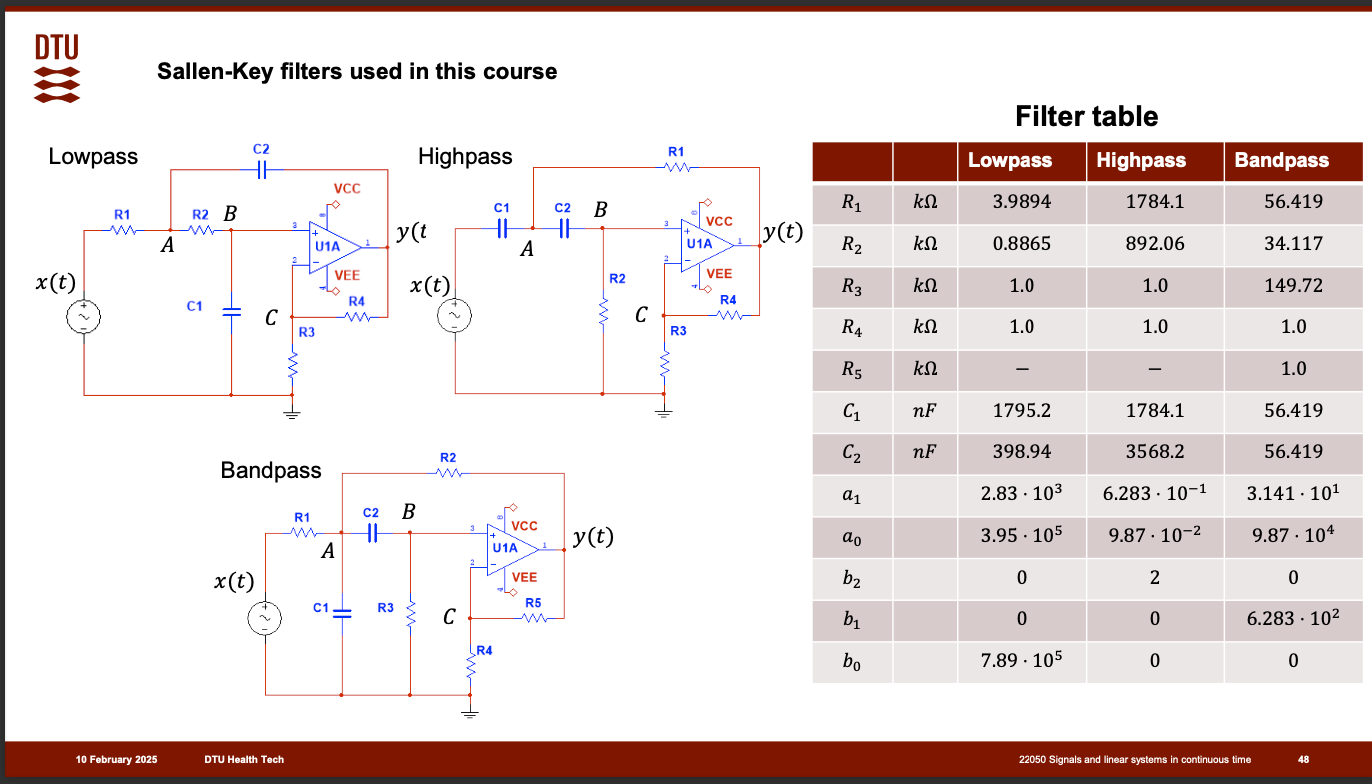

# Filter 4: Lowpass filter – impulse response

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

R1_val = 3.9894e3 # Ohm
R2_val = 0.8865e3 # Ohm
R3_val = 1e3 # Ohm
R4_val = 1e3 # Ohm
C1_val = 1795.2e-9 # F
C2_val = 398.94e-9 # F

## 1

Classify the system as linear/nonlinear, time-invariant/time-variant, causal/noncausal.

We know from problem Filter 1 that the system has a linear differential equation with constant coefficients.

It is therefore ***linear*** and ***time-invariant.***

The system does not require future input values and is therefore ***causal.***

## writing up equations and some extra stuff

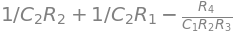

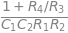

In [3]:
R1, R2, R3, R4, C1, C2, K = symbols('R1 R2 R3 R4 C1 C2 K')

# Results from previous week
K  = 1 + R4/R3
a1 = 1/(R2*C2) + 1/(R1*C2) + (1 - K)/(R2*C1)
a0 = 1/(R1*R2*C1*C2)
b0 = K/(R1*R2*C1*C2)

list1 = [a1, a0, b0, K]
for val in list1:
    display(val)

### finding the roots

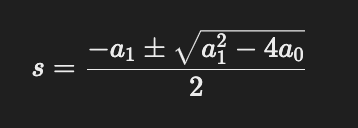

In [4]:
# insert values
a1_val = a1.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val})
a0_val = a0.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val})
b0_val = b0.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val})
K_val = K.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val})

# calculating the roots of the characteristic equation
s1 = ( -a1 - sqrt(a1**2 - 4*a0) ) / 2
s2 = ( -a1 + sqrt(a1**2 - 4*a0) ) / 2
s1_val = s1.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val, K: K})
s2_val = s2.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val, K: K})

print(s1_val, s2_val)

# alternative way to calculate the roots
poles = np.roots([1, a1_val, a0_val])
print(poles)

-2680.23174217644 -147.306159710264
[-2680.23174218  -147.30615971]


In [5]:
vals = {}
for i, val in enumerate([a1_val, a0_val, b0_val, K_val]): # enumerate ads an index to each element in the list
    print(i, val, type(val)) # Check the type before conversion
    if isinstance(val, Float):  # Correct way to check SymPy Float type
        val = float(val)  # Convert to Python float
        key_name = f"val_{i}"  # Use proper key names
        vals[key_name] = (val, type(val)) # key, value -> key_name, tuple

# print out the dictionary
print('\n')
for key, val in vals.items():
    print(key, val)

# reassign variables with extracted float values
a1_val, a0_val, b0_val, K_val = [val[0] for val in vals.values()]     # vals_list = []
                                                                      # for val in vals.values():
                                                                      #     vals_list.append(val[0])
                                                                      # print(vals_list)
a1_val, a0_val, b0_val, K_val

0 2827.53790188671 <class 'sympy.core.numbers.Float'>
1 394814.645073562 <class 'sympy.core.numbers.Float'>
2 789629.290147123 <class 'sympy.core.numbers.Float'>
3 2.00000000000000 <class 'sympy.core.numbers.Float'>


val_0 (2827.537901886707, <class 'float'>)
val_1 (394814.6450735615, <class 'float'>)
val_2 (789629.290147123, <class 'float'>)
val_3 (2.0, <class 'float'>)


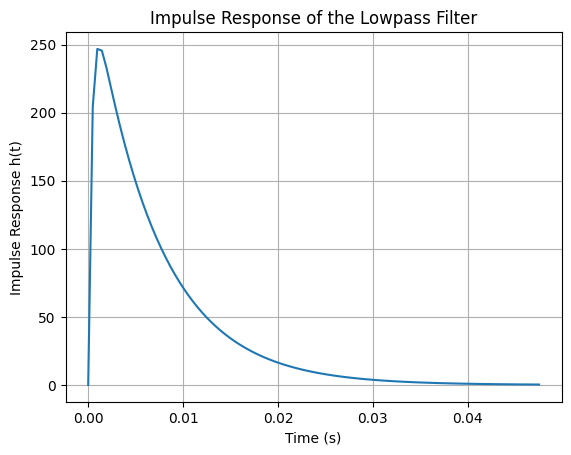

In [6]:
# Transfer function representation H(s) = Num(s) / Den(s)
numerator = [b0_val]  # b0
denominator = [1.0, a1_val, a0_val]  # s^2 + a1*s + a0

# Create system
system = signal.lti(numerator, denominator)

# Compute impulse response
t, h_t = signal.impulse(system) # (time vector, impulse response)

# Plot the impulse response
plt.plot(t, h_t)
plt.xlabel("Time (s)")
plt.ylabel("Impulse Response h(t)")
plt.title("Impulse Response of the Lowpass Filter")
plt.grid()
plt.show()

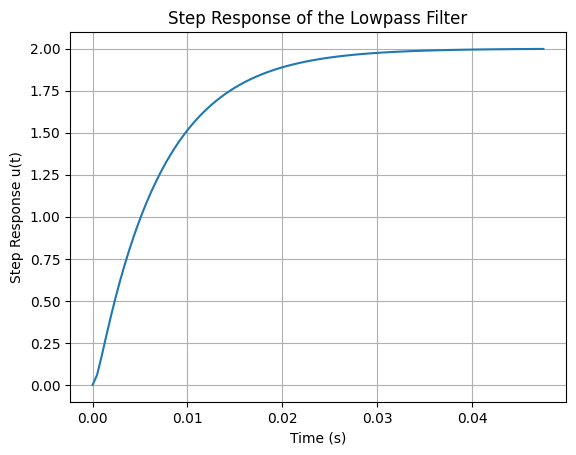

In [7]:
t, u_t = signal.step(system) # (time vector, impulse response)

# Plot the impulse response
plt.plot(t, u_t)
plt.xlabel("Time (s)")
plt.ylabel("Step Response u(t)")
plt.title("Step Response of the Lowpass Filter")
plt.grid()
plt.show()

## 2

Draw the roots of the characteristic equation in the complex plane.

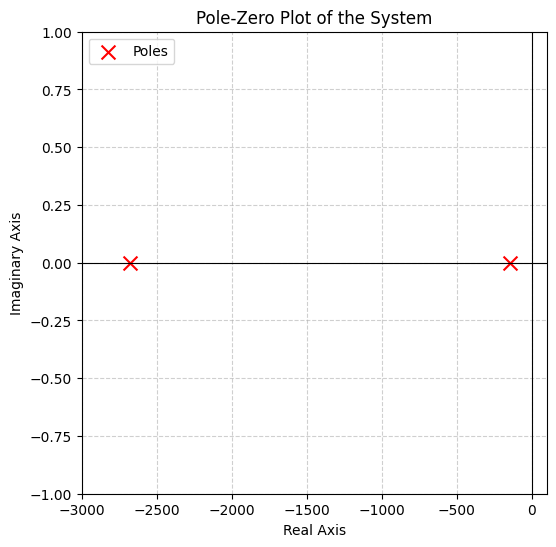

In [8]:
# Compute characteristic equation roots (poles)
poles = np.roots([1, a1_val, a0_val])

# Plot Zero-Pole diagram
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.8)  # X-axis
plt.axvline(0, color='black', linewidth=0.8)  # Y-axis

# Plot poles (roots of denominator)
plt.scatter(poles.real, poles.imag, marker='x', color='red', s=100, label="Poles")

# Axis formatting
plt.xlim(-3000, 100)  # Adjust x-axis range for better visualization
plt.ylim(-1, 1)  # No imaginary component, keep y small
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.title("Pole-Zero Plot of the System")
plt.legend()
plt.show()

## 3

Based on the roots of the characteristic equation, classify the system as underdamped, critically damped, or overdamped. 

If the system is close to being critically damped (but not exactly), 

you can assume that is what was intended.

--

Two real roots, hence an overdamped system.


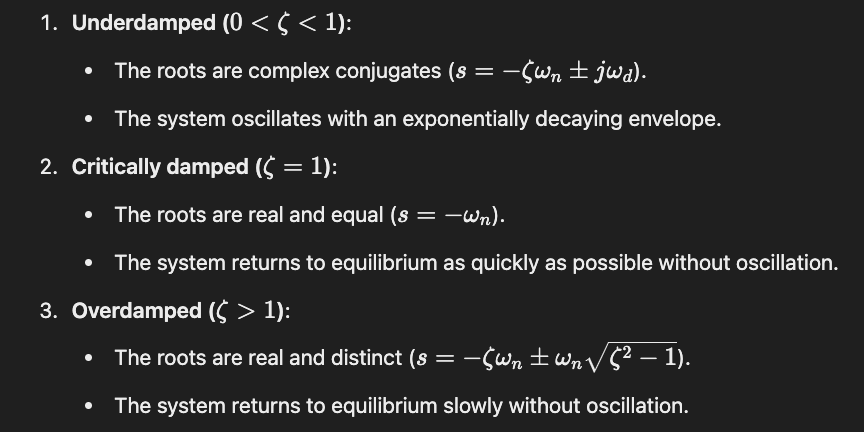

## 4

Check if the decomposition property holds for the system. 

If it does, the solution to the homogeneous differential equation is also the system’s zero-input response

Decomposition property? The system is linear and time-invariant. 

Superposition holds and decomposition is possible.

## 5

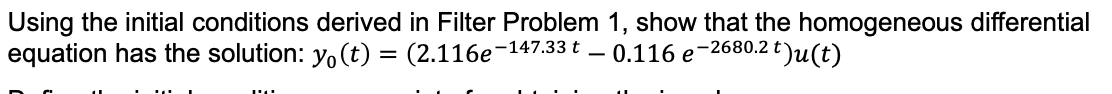

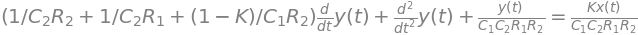

In [9]:
t = symbols('t')
y = Function('y')(t)
x = Function('x')(t)
R1, R2, C1, C2, K = symbols('R1 R2 C1 C2 K')

# Define coefficients
a1 = (1 / (R2 * C2)) + (1 / (R1 * C2)) + ((1 - K) / (R2 * C1))
a0 = 1 / (R1 * R2 * C1 * C2)
b0 = K / (R1 * R2 * C1 * C2)

# equation from filter problenm 1
eq1 = Eq(diff(y, t, 2) + a1 * diff(y, t) + a0 * y, b0 * x)
display(eq1)

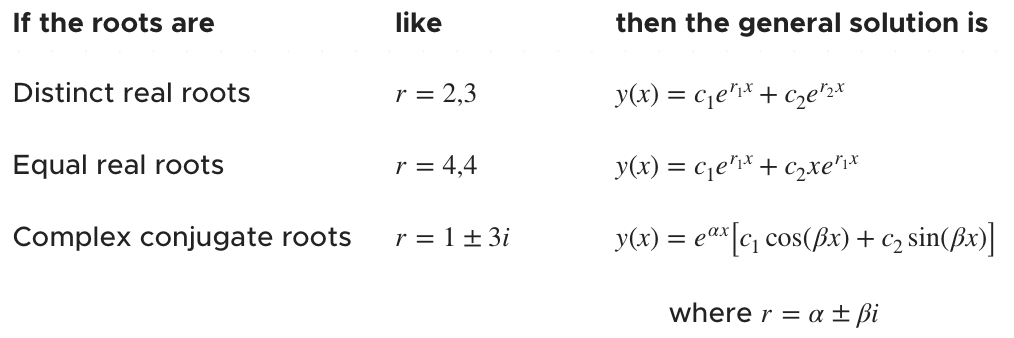

In [10]:
# Characteristic roots (from the problem)
r1 = -147.33 # roots are distinct real roots
r2 = -2680.2

# General solution when distinct real roots
y_general = C1 * exp(r1*t) + C2 * exp(r2*t)
y_general

to solve for C1 and C2 To solve for, we need two independent equations

In [11]:
# Initial conditions : y(0) = 2, y'(0) = 
ics = [y0 := 2, dy0 := 0]

# We substitute t=0 into this equation using .subs(t, 0) and set it equal to the initial condition
eq1 = Eq(y_general.subs(t, 0), y0)  # y(0) = 2

# This ensures that the solution satisfies the initial displacement.
display(eq1)

In [12]:
# We substitute t=0 into the derivative of y(t) using .subs(t, 0) and set it equal to the initial condition
eq2 = Eq(y_general.diff(t).subs(t, 0), dy0)  # y'(0) = 0

# This ensures that the solution satisfies the initial velocity condition.
display(eq2)

In [13]:
# Solve for C1, C2
constants = solve((eq1, eq2), (C1, C2))
display(constants)

# Final solution
y_solution = (y_general.subs(constants) * Heaviside(t))

y_solution

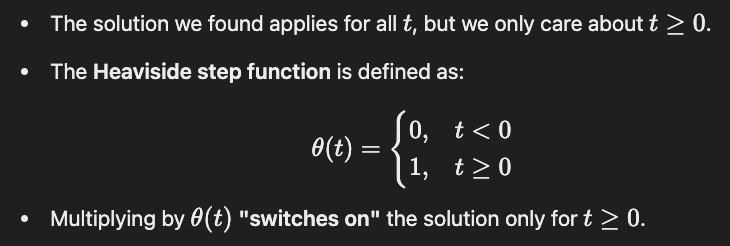

## 6

Define the initial conditions appropriate for obtaining the impulse response.

$𝑦(0_+) = 0$ 

$\dot{y}(0_+) = 1$

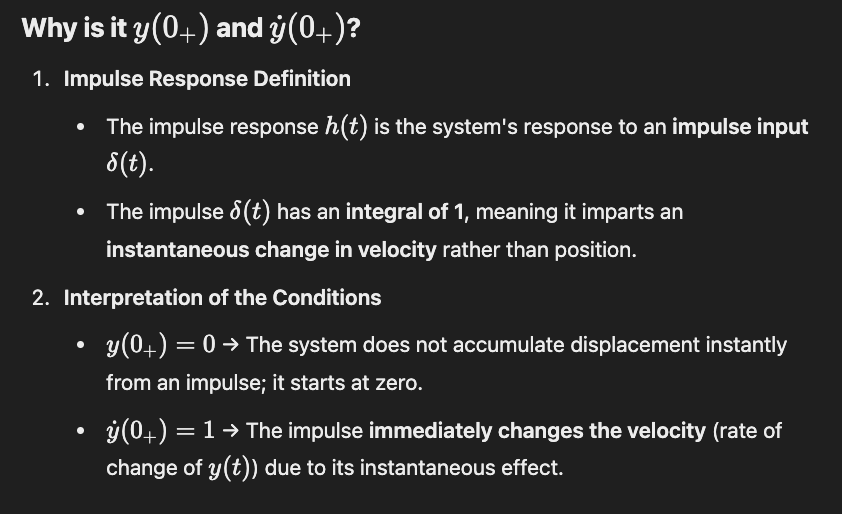

## 7

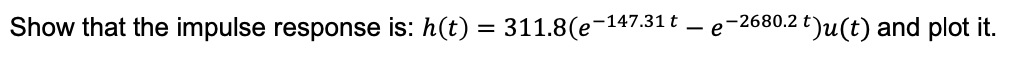

In [14]:
# Initial conditions : y(0) = 0, y'(0) = 1
ics = [y0 := 0, dy0 := 1]

# We substitute t=0 into this equation using .subs(t, 0) and set it equal to the initial condition
eq1 = Eq(y_general.subs(t, 0), y0)  # y(0) = 2

# This ensures that the solution satisfies the initial displacement.
display(eq1)

# We substitute t=0 into the derivative of y(t) using .subs(t, 0) and set it equal to the initial condition
eq2 = Eq(y_general.diff(t).subs(t, 0), dy0)  # y'(0) = 0

# This ensures that the solution satisfies the initial velocity condition.
display(eq2)

# Solve for C1, C2
constants = solve((eq1, eq2), (C1, C2))
display(constants)

# Final solution
y_solution = y_general.subs(constants) 

y_solution

In [15]:
R1_val = 3.9894e3 # Ohm
R2_val = 0.8865e3 # Ohm
R3_val = 1e3 # Ohm
R4_val = 1e3 # Ohm
C1_val = 1795.2e-9 # F
C2_val = 398.94e-9 # F
K_val = 1 + R4_val/R3_val # op-amp gain

b0

In [16]:
# Scale the homogeneous solution by b0
h_solution = b0 * y_solution  

# Substitute parameter values into the final expression
h_solution = h_solution.subs({R1: R1_val, R2: R2_val, C1: C1_val, C2: C2_val, K: K_val, })
h_solution * Heaviside(t)  # multiply the heavisde later to avoid strange result

# Filter 5: Highpass filter – impulse response

In [17]:
clear_variables()
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

R1_val = 1784.1e3  # Ohm
R2_val = 892.06e3  # Ohm
R3_val = 1e3       # Ohm
R4_val = 1e3       # Ohm
C1_val = 1784.1e-9 # F
C2_val = 3568.2e-9 # F

## 1

Classify the system as linear/nonlinear, time-invariant/time-variant, causal/noncausal.

We know from problem Filter 3 that the system has a linear differential equation with constant coefficients.

It is therefore linear and time-invariant.

The system can be built and is therefore causal.

## 2

Draw the roots of the characteristic equation in the complex plane.

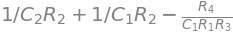

In [18]:
R1, R2, R3, R4, C1, C2, K = symbols('R1 R2 R3 R4 C1 C2 K')

# Results from previous week
K  = 1 + R4/R3
a1 = 1/(R2*C2) + 1/(R2*C1) + (1 - K)/(R1*C1)
a0 = 1/(R1*R2*C1*C2)
b2 = K

list1 = [a1, a0, b2, K]
for val in list1:
    display(val)

In [19]:
# insert values
a1_val = a1.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, C1: C1_val, C2: C2_val})
a0_val = a0.subs({R1: R1_val, R2: R2_val, C1: C1_val, C2: C2_val})
b2_val = b2.subs({R3: R3_val, R4: R4_val})
K_val = K.subs({R3: R3_val, R4: R4_val})

print(a1_val, a0_val, b2_val, K_val)

0.628324951659592 0.0987002740781889 2.00000000000000 2.00000000000000


[-0.31416248+0.00148757j -0.31416248-0.00148757j]


0


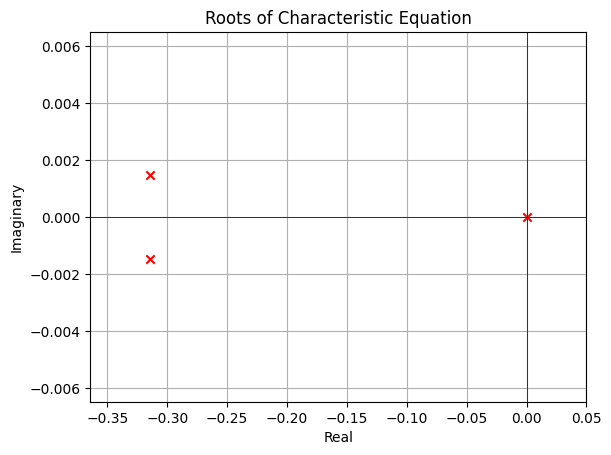

In [20]:
# calculate the roots
poles = np.roots([1, a1_val, a0_val])
print(poles)
print('\n')

# and zeros
# to find the zeros of a function set it equal to zero and solve for s
zeros = 0 / b2_val  # Solve b2*s + 0 = 0
print(zeros)

# plotting
# dynamic scaling of the axes
plt.xlim(poles.real.min() - 0.05, 0.05)
plt.ylim(poles.imag.min() - 0.005, poles.imag.max() + 0.005)

plt.scatter(poles.real, poles.imag, marker='x', color='red')
plt.scatter(zeros, 0, marker='x', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Roots of Characteristic Equation")
plt.show()

In [21]:
print(poles)

[-0.31416248+0.00148757j -0.31416248-0.00148757j]


In [22]:
pole1, pole2 = [-0.31416248+0.00148757j, -0.31416248-0.00148757j]

## 3

Based on the roots of the characteristic equation, classify the system as underdamped, critically damped, or overdamped. 

If the system is close to being critically damped (but not exactly), 

you can assume that is what was intended.

--

A double root, hence, a critically damped system.

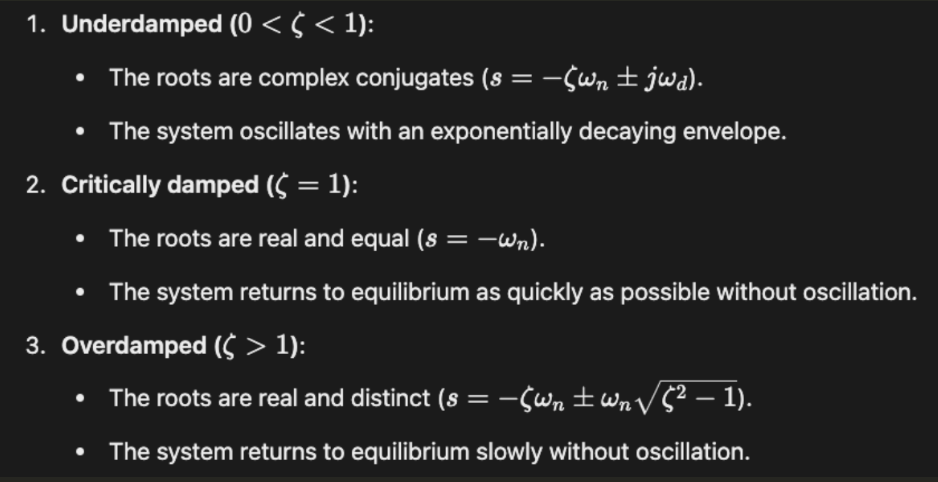

## 4

Check if the decomposition property holds for the system. 

If it does, the solution to the homogeneous differential equation is also the system’s zero-input response

The system is linear and time-invariant. 

Superposition holds and decomposition is possible.

## 5

Using the initial conditions derived in Filter Problem 2, 

show that the homogeneous differential equation has the solution: $ 𝑦_0(t) = 0 $

In [23]:
# initial conditions from filter problem 2
ics = [y0 := 2, dy0 := 0]

In [24]:
t = symbols('t')
y_h = Function('y_h')(t)
y_p = Function('y_p')(t)
y = y_h + y_p

# Define the particular solution's initial conditions (assumed from problem 2)
y_p0 = 2  # y_p(0) (steady-state output at t=0)
dy_p0 = 0  # y_p'(0)

# Compute the homogeneous initial conditions
y_h0 = y0 - y_p0  # y_h(0)
dy_h0 = dy0 - dy_p0  # y_h'(0)

# Display results
print("Homogeneous Initial Conditions:")
print(f"y_h(0) = {y_h0}")
print(f"y_h'(0) = {dy_h0}")
print('\n')

# Verify the homogeneous solution
if y_h0 == 0 and dy_h0 == 0:
    print('The homogeneous solution satisfies zero initial conditions, the only possible solution is: ')
    print("y_h(t) = 0")
else:
    print("Recheck the particular solution y_p(0) and y_p'(0).")


Homogeneous Initial Conditions:
y_h(0) = 0
y_h'(0) = 0


The homogeneous solution satisfies zero initial conditions, the only possible solution is: 
y_h(t) = 0


## 6

Define the initial conditions appropriate for obtaining the impulse response.

$𝑦(0_+) = 0$ 

$\dot{y}(0_+) = 1$

## 7  XX

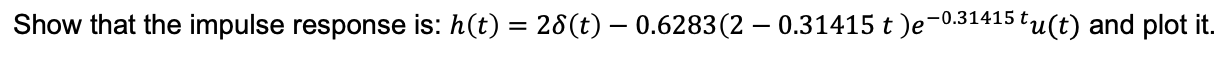

In [25]:
# TODO: not correct

In [26]:
# # Define lambda (eigenvalues of system)
# lambda_ = symbols('lambda')
# char_eq = lambda_**2 + a1_val * lambda_ + a0_val

# # Solve for lambda
# lambdas = solve(char_eq, lambda_)

# # Assign alpha and beta
# alpha_val = lambdas[0].as_real_imag()[0]  # Real part of root
# beta_val = abs(lambdas[0].as_real_imag()[1])  # Imaginary part of root

# # Print values
# print(f"alpha = {alpha_val}")
# print(f"beta = {beta_val}")

In [27]:
# t, C1, C2 = symbols('t C1 C2')
# alpha, beta = symbols('alpha beta', real=True)

# # General solution
# # y_general = exp(alpha * t) * (C1 * cos(beta*t) + C2 * sin(beta*t))

# y_general = (C1 + C2 * t) * exp(alpha * t)


# # Initial conditions
# y0 = 0
# dy0 = 1

# # Apply initial conditions
# eq1 = Eq(y_general.subs(t, 0), y0)  # y(0) = 0
# eq2 = Eq(y_general.diff(t).subs(t, 0), dy0)  # y'(0) = 1

# # Solve for C1, C2
# constants = solve((eq1, eq2), (C1, C2))

# # Final solution
# y_solution = y_general.subs(constants)
# pprint(y_solution)
# print('\n')

# y_solution = y_solution.subs({alpha: alpha_val, beta: beta_val})
# pprint(y_solution)
# print('\n')

# # Define circuit parameters
# R1_val = 1784.1e3  # Ohm
# R2_val = 892.06e3  # Ohm
# C1_val = 1784.1e-9 # F
# C2_val = 3568.2e-9 # F

# # Define b2 if needed (this needs to be checked)
# b2 = 2  # Placeholder, check definition

# # Scale the homogeneous solution by b2
# h_solution = b2 * y_solution  

# # Substitute parameter values
# h_solution = h_solution.subs({R1: R1_val, R2: R2_val, C1: C1_val, C2: C2_val})

# # Apply Heaviside function
# pprint(h_solution * Heaviside(t))


# Filter 6: Bandpass filter – impulse response

In [28]:
clear_variables()
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

R1_val = 56.419e3  # Ohm
R2_val = 34.117e3  # Ohm
R3_val = 149.72e3  # Ohm
R4_val = 1e3       # Ohm
R5_val = 1e3       # Ohm
C1_val = 56.419e-9 # F
C2_val = 56.419e-9 # F


# 1

Classify the system as linear/nonlinear, time-
invariant/time-variant, causal/noncausal.


We know from problem Filter 3 that the system has a linear differential equation with constant coefficients.

It is therefore linear and time-invariant.

The system can be built and is therefore causal.

# 2

Draw the roots of the characteristic equation in the complex plane.

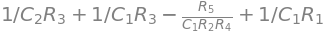

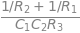

In [29]:
R1, R2, R3, R4, R5, C1, C2, K = symbols('R1 R2 R3 R4 R5 C1 C2 K')

# Results from previous week
K  = 1 + R5/R4
a1 = 1/(R1*C1) + 1/(R3*C2) + 1/(R3*C1) + (1 - K)/(R2*C1)
a0 = (1/R1 + 1/R2) * 1/(R3*C1*C2)
b1 = 1/(R1*C1) * K

list1 = [a1, a0, b1, K]
for val in list1:
    display(val)

In [30]:
# insert values
a1_val = a1.subs({R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val, R5: R5_val, C1: C1_val, C2: C2_val})
a0_val = a0.subs({R1: R1_val, R2: R2_val, R3: R3_val, C1: C1_val, C2: C2_val})
b1_val = b1.subs({R1: R1_val, R4: R4_val, R5: R5_val, C1: C1_val})
K_val = K.subs({R5: R5_val, R4: R4_val})


print(a1_val, a0_val, b1_val, K_val)

31.4059708647812 98694.8511261273 628.317603141910 2.00000000000000


Poles: [-15.70298543+313.76466878j -15.70298543-313.76466878j]
Zeros: [0]


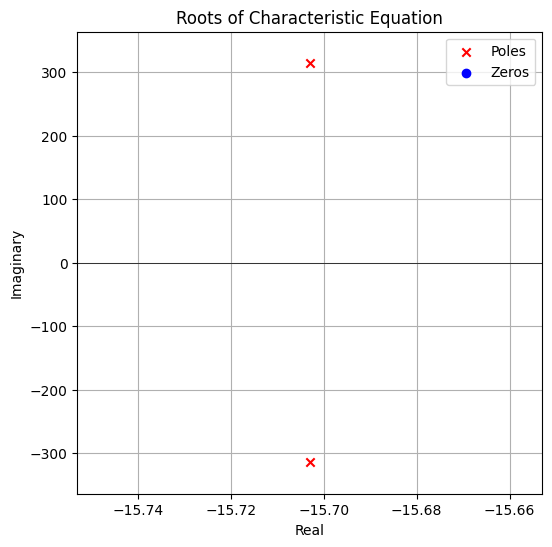

In [31]:
# Calculate the roots (poles)
poles = np.roots([1, a1_val, a0_val])
print("Poles:", poles)

# Find the zeros (solve b1_val = 0 for s)
zeros = solve(b1, K)
print("Zeros:", zeros)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(poles.real, poles.imag, marker='x', color='red', label="Poles")
plt.scatter(zeros, 0, marker='o', color='blue', label="Zeros")

# Adjust plot limits dynamically
real_min, real_max = poles.real.min() - 0.05, poles.real.max() + 0.05
imag_min, imag_max = poles.imag.min() - 50, poles.imag.max() + 50  # Increased range


plt.xlim(real_min, real_max)
plt.ylim(imag_min, imag_max)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Roots of Characteristic Equation")
plt.legend()
plt.show()

## 3

Based on the roots of the characteristic equation, classify the system as underdamped, critically

damped, or overdamped. If the system is close to being critically damped (but not exactly), you

can assume that is what was intended.

Complex conjugated roots, hence, an underdamped system.

## 4

Check if the decomposition property holds for the system. If it does, the solution to the

homogeneous differential equation is also the system’s zero-input response

The system is linear and time-invariant. Superposition
holds and decomposition is possible.

## 5  XXX

Using the initial conditions derived in Filter Problem 3,

show that the homogeneous differential equation has the solution: $𝑦_0(t) = 0$

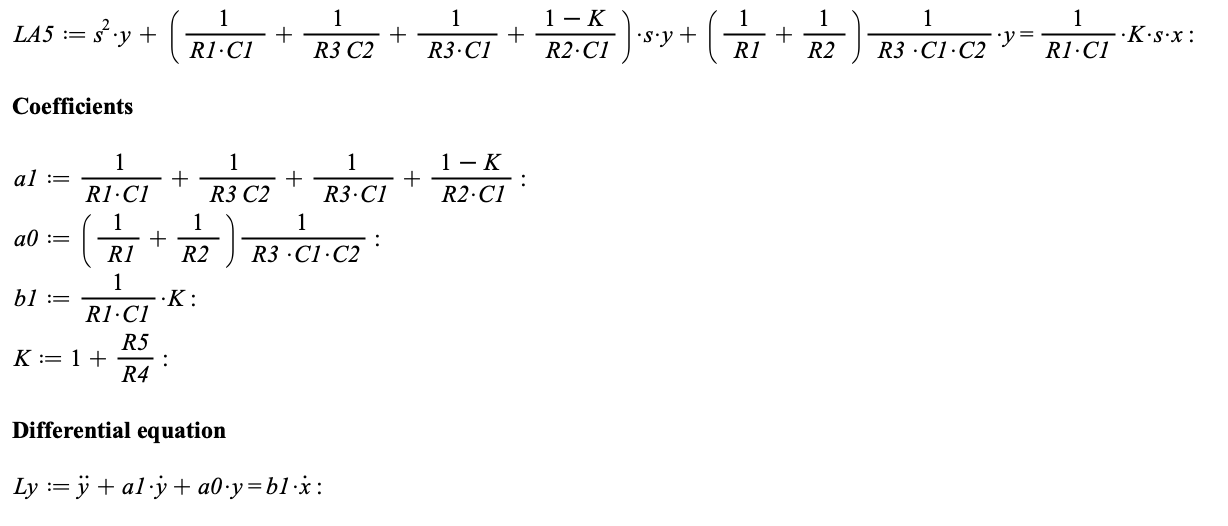

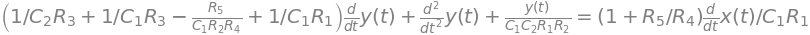

In [32]:
# R1, R2, R3, R4, R5, C1, C2, K = symbols('R1 R2 R3 R4 R5 C1 C2 K')
# y, x, t = symbols('y x t')

# # Results from previous week
# K  = 1 + R5/R4
# a1 = 1/(R1*C1) + 1/(R3*C2) + 1/(R3*C1) + (1 - K)/(R2*C1)
# a0 = (1/R1 + 1/R2) * 1/(R3*C1*C2)
# b1 = 1/(R1*C1) * K

# # Correct differential equation
# eq1 = Eq(diff(y, t, 2) + a1 * diff(y, t) + a0 * y, b1 * diff(x, t))
# display(eq1)


t = symbols('t')
y = Function('y')(t)
x = Function('x')(t)
R1, R2, R3, R4, R5, C1, C2, K = symbols('R1 R2 R3 R4 R5 C1 C2 K')

# Define K correctly
K = 1 + R5 / R4

# Corrected coefficients
a1 = (1 / (R1 * C1)) + (1 / (R3 * C2)) + (1 / (R3 * C1)) + ((1 - K) / (R2 * C1))
a0 = (1 / (R1 * R2 * C1 * C2))
b1 = K / (R1 * C1)

# Define the differential equation
eq1 = Eq(diff(y, t, 2) + a1 * diff(y, t) + a0 * y, b1 * diff(x, t))
display(eq1)

In [33]:
# Calculate the roots (poles)
poles = np.roots([1, a1_val, a0_val])
print(poles)

[-15.70298543+313.76466878j -15.70298543-313.76466878j]


In [34]:
pole1, pole2 = [-15.70298543+313.76466878j, -15.70298543-313.76466878j]

# Characteristic roots (from the problem)
r1 = pole1
r2 = pole2

alpha, beta = r1.real, r1.imag # = r2.real, r2.imag

# General solution when complex conjugate roots
y_general = exp(alpha*t) * (C1 * cos(beta*t) + C2 * sin(beta*t))
display(y_general)

# initial conditions from filter problem 3
ics = [y0 := 0, dy0 := 628.3176032]        # which one is not WRONG ???
# ics = [y0 := 0, dy0 := 0]

ics = {y.subs(t, 0): y0, y.diff(t).subs(t, 0): dy0}
display(ics)



# We substitute t=0 into this equation using .subs(t, 0) and set it equal to the initial condition
eq1 = Eq(y_general.subs(t, 0), y0)  # y(0) = 2

# This ensures that the solution satisfies the initial displacement.
display(eq1)


# We substitute t=0 into the derivative of y(t) using .subs(t, 0) and set it equal to the initial condition
eq2 = Eq(y_general.diff(t).subs(t, 0), dy0)  # y'(0) = 0

# This ensures that the solution satisfies the initial velocity condition.
display(eq2)

# Solve for C1, C2
constants = solve((eq1, eq2), (C1, C2))
display(constants)

# Final solution
y_solution = (y_general.subs(constants) * Heaviside(t))

display(y_solution)

### some conflicting values in the solutions, so not sure how to do this one

## 6

Define the initial conditions appropriate for obtaining the impulse response.

ics = [y0 := 0, dy0 := 1]


## 7 xxx

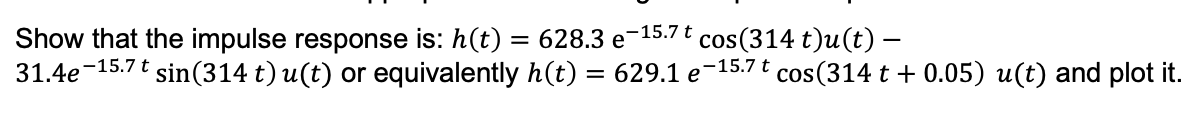

In [35]:
# TODO: not correct, fix problem 5 first

In [36]:
# Initial conditions : y(0) = 0, y'(0) = 1
ics = [y0 := 0, dy0 := 1]

# We substitute t=0 into this equation using .subs(t, 0) and set it equal to the initial condition
eq1 = Eq(y_general.subs(t, 0), y0)  # y(0) = 2

# This ensures that the solution satisfies the initial displacement.
display(eq1)

# We substitute t=0 into the derivative of y(t) using .subs(t, 0) and set it equal to the initial condition
eq2 = Eq(y_general.diff(t).subs(t, 0), dy0)  # y'(0) = 0

# This ensures that the solution satisfies the initial velocity condition.
display(eq2)

# Solve for C1, C2
constants = solve((eq1, eq2), (C1, C2))
display(constants)

# Final solution
y_solution = y_general.subs(constants) 

display(y_solution)

In [37]:
R1_val = 56.419e3  # Ohm
R2_val = 34.117e3  # Ohm
R3_val = 149.72e3  # Ohm
R4_val = 1e3       # Ohm
R5_val = 1e3       # Ohm
C1_val = 56.419e-9 # F
C2_val = 56.419e-9 # F

In [38]:
# Scale the homogeneous solution by b0
h_solution = b1 * y_solution  

# Substitute parameter values into the final expression
h_solution = h_solution.subs({R1: R1_val, R2: R2_val, C1: C1_val, C2: C2_val, K: K_val, R5: R5_val, R4: R4_val})
display(h_solution * Heaviside(t))  # multiply the heavisde later to avoid strange result